In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir,'..')))

In [23]:
from scripts.data_load import load_data
from scripts.data_visualization import *
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
tellco_data = load_data("../data/Data/Copy of Week2_challenge_data_source(CSV).csv")

In [4]:
print(tellco_data.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [5]:
print(tellco_data.isnull().sum())

Bearer Id                                      991
 Start                                           1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [6]:
print(tellco_data.dtypes)

Bearer Id                                   float64
 Start                                       object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


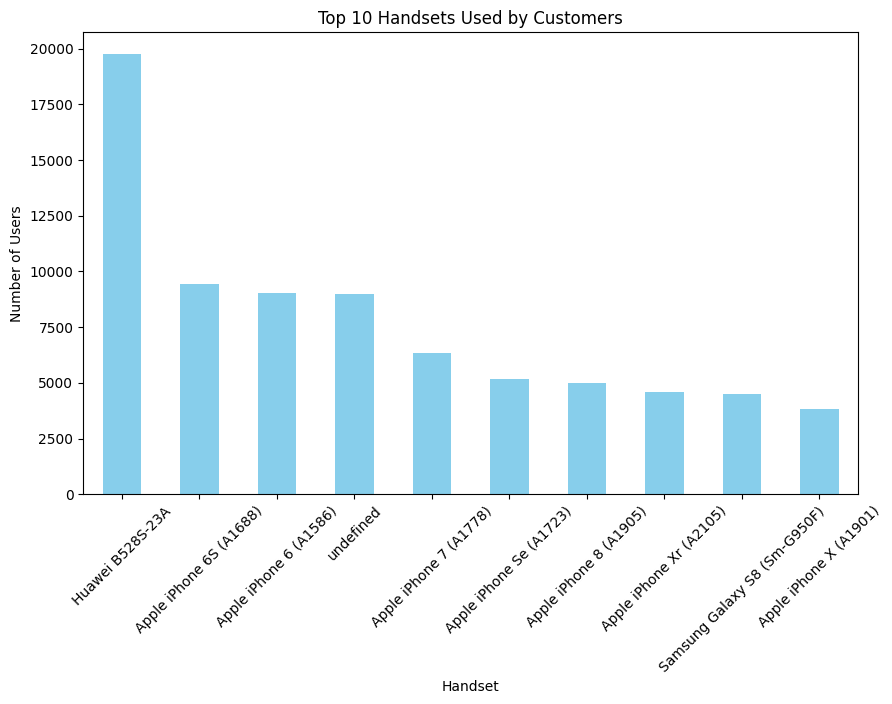

In [7]:
top_handsets = tellco_data['Handset Type'].value_counts().head(10)

print(top_handsets)

plot_visual(top_handsets, 'Handset', 'Number of Users', 'Top 10 Handsets Used by Customers', plt_kind='bar', plt_color='skyblue')

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


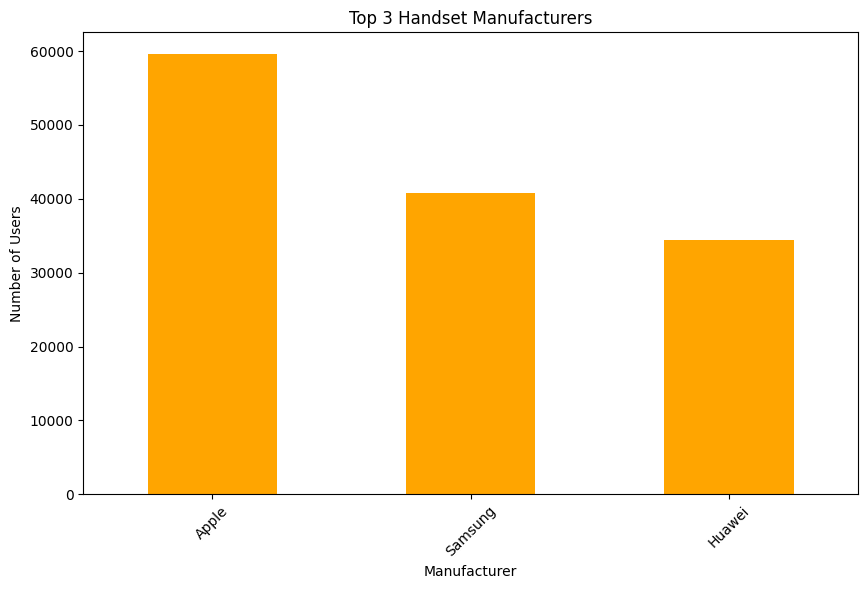

In [8]:
top_manufacturers = tellco_data['Handset Manufacturer'].value_counts().head(3)

print(top_manufacturers)

plot_visual(top_manufacturers, 'Manufacturer', 'Number of Users', 'Top 3 Handset Manufacturers', plt_kind='bar', plt_color='orange')

Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


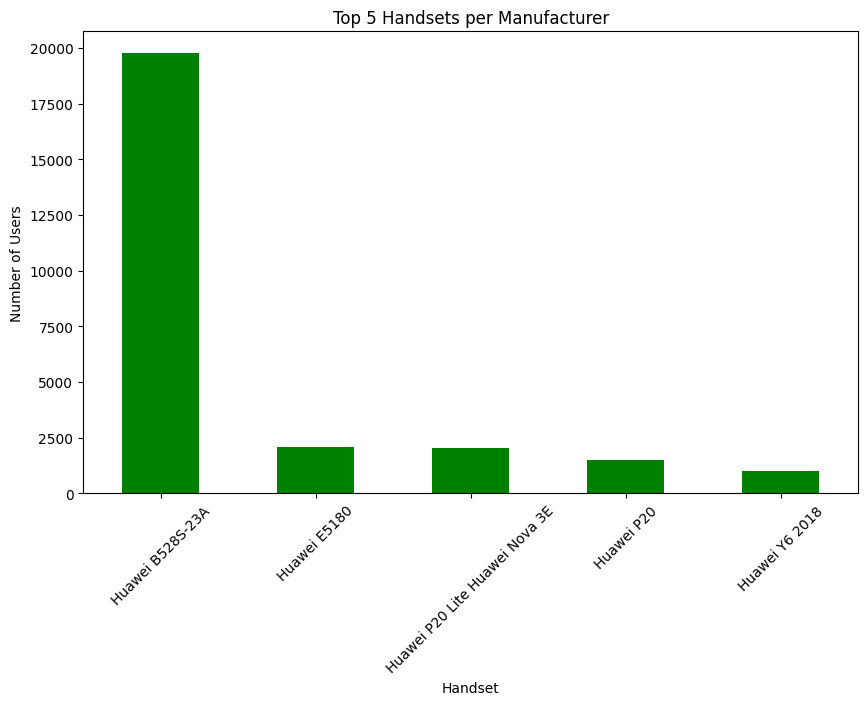

In [9]:
for manufacturer in top_manufacturers.index:
    top_handsets_per_manufacturer = tellco_data[tellco_data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(top_handsets_per_manufacturer)
plot_visual(top_handsets_per_manufacturer, 'Handset', 'Number of Users', 'Top 5 Handsets per Manufacturer', plt_kind='bar', plt_color='green')

Task 1.1

In [10]:
user_metrics = tellco_data.groupby('IMSI').agg(
    xDR_sessions=('Bearer Id', 'count'),
    total_duration=('Dur. (ms)', 'sum'),
    total_download=('Total DL (Bytes)', 'sum'),
    total_upload=('Total UL (Bytes)', 'sum'),
    total_data_volume=('Total DL (Bytes)', 'sum')
).reset_index()

user_metrics.head()

,IMSI,xDR_sessions,total_duration,total_download,total_upload,total_data_volume
0,2.040471e+14,1,869844.0,78697597.0,60456049.0,78697597.0
1,2.040808e+14,1,877385.0,194828056.0,37295915.0,194828056.0
2,2.082001e+14,1,86019.0,31376981.0,53794658.0,31376981.0
3,2.082001e+14,1,86254.0,392918313.0,33583272.0,392918313.0
4,2.082001e+14,2,573923.0,961767023.0,71325004.0,961767023.0


Task 1.2

In [11]:
tellco_data.dtypes

Bearer Id                                   float64
 Start                                       object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [12]:
tellco_data['Total Data'] = tellco_data['Total UL (Bytes)'] + tellco_data['Total DL (Bytes)']

tellco_data['duration_decile'] = pd.qcut(tellco_data['Dur. (ms)'], 5, labels=[1, 2, 3, 4, 5])

decile_data = tellco_data.groupby('duration_decile').agg(
    total_data=('Total Data', 'sum'),
    avg_duration=('Dur. (ms)', 'mean'),
    user_count=('MSISDN/Number', 'nunique')
).reset_index()

print(decile_data)

  duration_decile    total_data   avg_duration  user_count
0               1  1.488357e+13   27813.424000       24331
1               2  2.362045e+13   76408.392630       36175
2               3  6.087404e+12   87624.999593       10976
3               4  1.485493e+13  117381.426767       27754
4               5  1.491834e+13  220433.852400       24813


C:\Users\USER\AppData\Local\Temp\ipykernel_9816\3658542392.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_data = tellco_data.groupby('duration_decile').agg(


In [13]:
basic_metrics = tellco_data[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data']].describe()
print(basic_metrics)

          Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)    Total Data
count  1.500000e+05      1.500000e+05      1.500000e+05  1.500000e+05
mean   1.046086e+05      4.546434e+08      4.112121e+07  4.957646e+08
std    8.103762e+04      2.441429e+08      1.127639e+07  2.443818e+08
min    7.142000e+03      7.114041e+06      2.866892e+06  2.895611e+07
25%    5.744050e+04      2.431068e+08      3.322201e+07  2.844759e+08
50%    8.639900e+04      4.558411e+08      4.114331e+07  4.968611e+08
75%    1.324302e+05      6.657055e+08      4.903424e+07  7.065059e+08
max    1.859336e+06      9.029696e+08      7.833131e+07  9.559848e+08


In [14]:
import numpy as np

dispersion_params = basic_metrics[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data']].agg(['var', 'std'])
mad_values = basic_metrics[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data']].apply(np.median)
dispersion_params.loc['mad'] = mad_values
print(dispersion_params)

        Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)    Total Data
var  3.939555e+11      9.806076e+16      6.996443e+14  1.081018e+17
std  6.276588e+05      3.131466e+08      2.645079e+07  3.287884e+08
mad  9.550378e+04      3.493932e+08      3.717161e+07  3.901203e+08


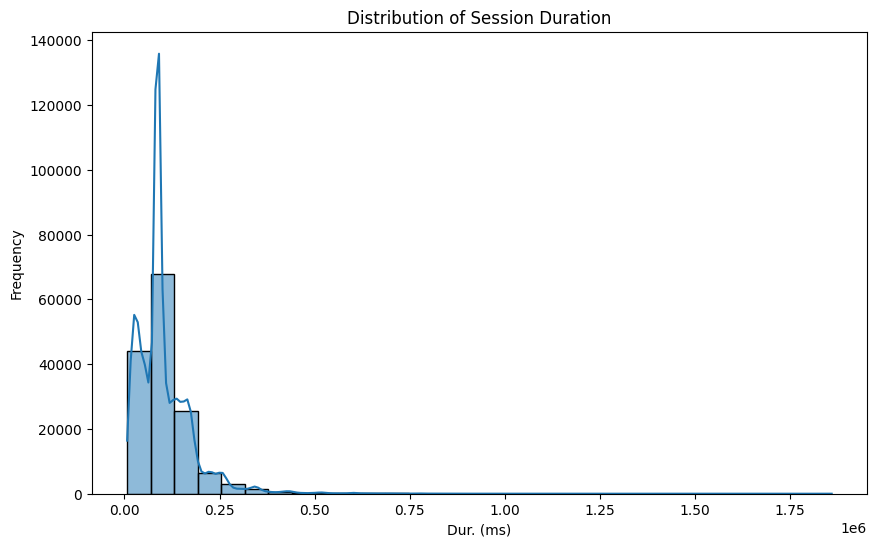

In [15]:
plot_univariate(tellco_data, column='Dur. (ms)', title='Distribution of Session Duration')

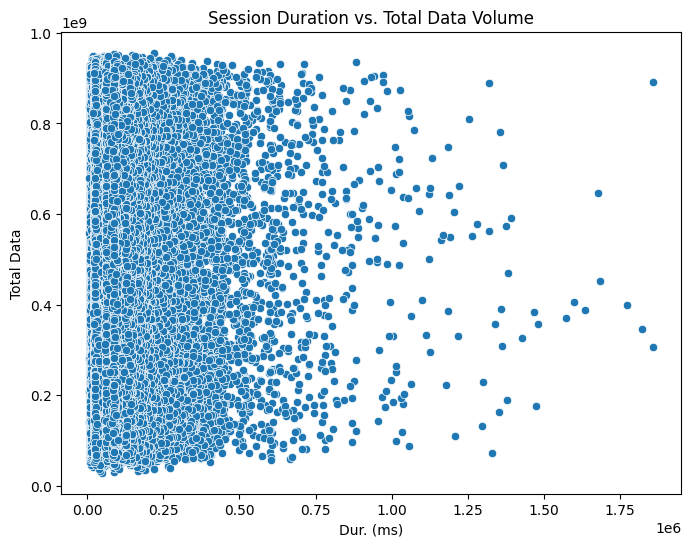

In [17]:
plot_bivariate(tellco_data, 'Dur. (ms)', 'Total Data', title='Session Duration vs. Total Data Volume')

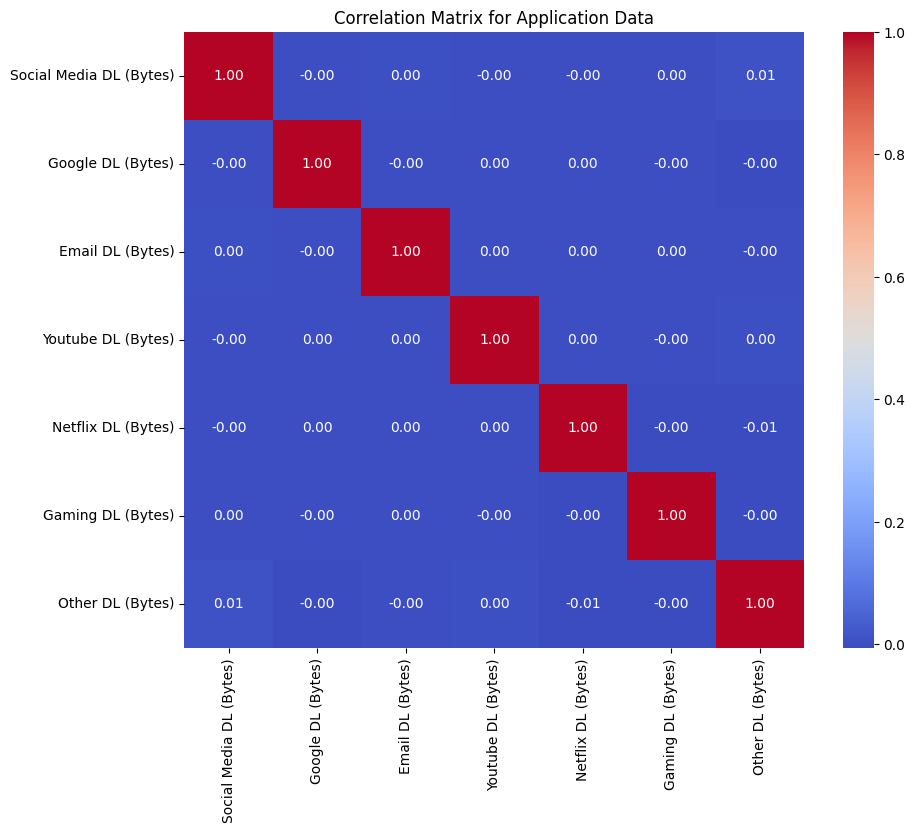

In [19]:
app_data = tellco_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']]

correlation_matrix = app_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Application Data')
plt.show()


Explained Variance: [0.14439453 0.14355429]


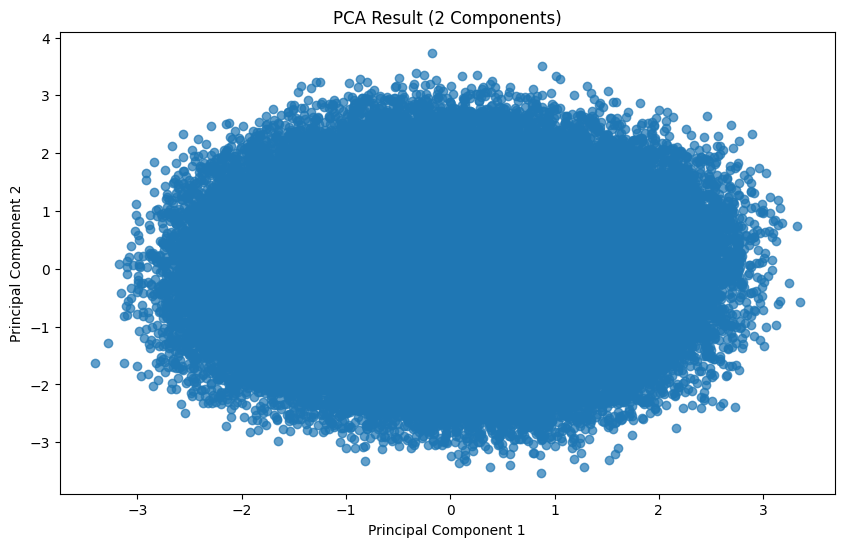

In [24]:
scaler = StandardScaler()
app_data_scaled = scaler.fit_transform(app_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(app_data_scaled)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA Result (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
